**2138921_DEEPAK_PATEL_CSCM45J - Coursework 2: Object Recognition**

==> LOAD ALL Dataset files in colab: 

1. trnLabel_coarse.npy
2. trnLabel_fine.npy
3. trnImage.npy  
4. tstImage.npy
5. tstLabel_coarse.npy
6. tstLabel_fine.npy 






In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tstImage.npy to tstImage.npy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature

==> Load datasets with numpy and check the shape of the data

In [ ]:
images = np.load('./trnImage.npy')
label_fine = np.load('./trnLabel_fine.npy')
label_coarse = np.load('./trnLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Images Fine Labels Shape: {label_fine.shape}')
print(f'Images Coarse Labels Shape: {label_coarse.shape}')
image_index = 2 # pick a specific image
image = images[:, :, :, image_index]

Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)


==> As mentioned in RunME verify reshaped ,Transpose and Looped data in order to use it for Machine Learning .
As per this verification I will be using transpose data for further processing.

Shape of reshaped: (50000, 32, 32, 3)
Shape of transposed: (50000, 32, 32, 3)
Shape of new_images: (50000, 32, 32, 3)


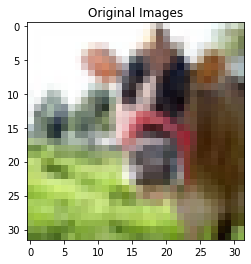

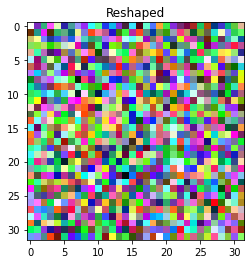

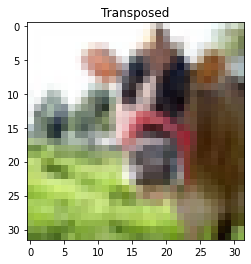

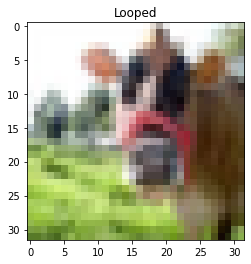

In [ ]:
# Lets call reshape on our 4D tensor
reshaped = np.reshape(images, (50000, 32, 32, 3))
print(f'Shape of reshaped: {reshaped.shape}')

# Lets call transpose on our 4D tensor
transposed = np.transpose(images, [3,0,1,2])
print(f'Shape of transposed: {transposed.shape}')

# Lets try looping over our 4D tensor, note how long this takes!
new_images = []
for i in range(images.shape[-1]):
    new_images.append(images[:,:,:,i])
new_images = np.asarray(new_images)
print(f'Shape of new_images: {new_images.shape}')

# Now lets look at what the result is
plt.figure()
plt.imshow(images[:,:,:,0])
plt.title('Original Images')
plt.show()
plt.figure()
plt.imshow(reshaped[0])
plt.title('Reshaped')
plt.show()
plt.figure()
plt.imshow(transposed[0])
plt.title('Transposed')
plt.show()
plt.figure()
plt.imshow(new_images[0])
plt.title('Looped')
plt.show()

==> As per RunMe extract the feature and view it .

In [ ]:
# Extract features from a single image
hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[6,6], cells_per_block=[2,2], visualize=True) # you may need to add "channel_axis=-1" if you are using the newest version of skimage

print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')

The extracted feature vector is of length 576 per sample


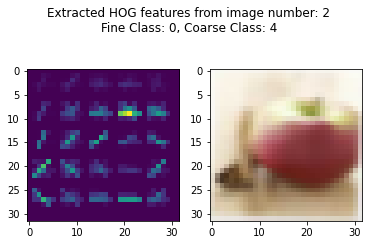

In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(image)
plt.suptitle(f'Extracted HOG features from image number: {image_index}\nFine Class: {label_fine[image_index]}, Coarse Class: {label_coarse[image_index]}')
plt.show(block=False)

In [ ]:
import tensorflow as tf

==> Just to check how much time it takes to load the data directly from cifar100 dataset.
this process takes very less time as compared to loading I did in start of the process using colab upload process.

In [ ]:
trn, tst = tf.keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 11s 0us/step


In [ ]:
for j in range(65,100):
    res = np.where(trn[1] == j)[0]

    for i in range(2):
        plt.figure()
        plt.imshow(trn[0][res[i]])

==> This section is to check what is tstLabel_fine and tstLabel_coarse


1.   tstLabel_coarse - its a superclass of 20 
2.   tstLabel_fine   - its a class of 100



In [ ]:
images_T = np.load('./tstImage.npy')
label_fine_T = np.load('./tstLabel_fine.npy')
label_coarse_T = np.load('./tstLabel_coarse.npy')


# Lets call transpose on our 4D tensor
transposed_T = np.transpose(images_T, [3,0,1,2])


print(transposed.shape)
print(label_fine.shape)
print(label_coarse.shape)

print(transposed_T.shape)
print(label_fine_T.shape)
print(label_coarse_T.shape)

print(max(label_fine_T))   # it's a  class
print(max(label_fine))     # it's a  class
print(max(label_coarse_T)) # it's a super class
print(max(label_coarse))   # it's a super class



(50000, 32, 32, 3)
(50000,)
(50000,)
(10000, 32, 32, 3)
(10000,)
(10000,)
99
99
19
19


19


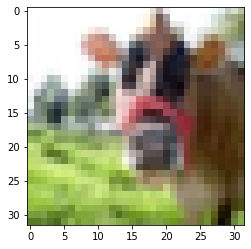

In [ ]:
plt.imshow(transposed[0])
print(label_fine[0])


49


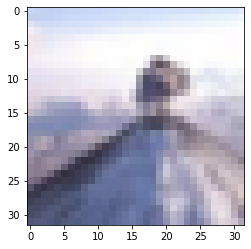

In [ ]:
plt.imshow(transposed_T[0])
print(label_fine_T[0])

==> first tried to train the model with normalised data by dividing 255 but the resutls was not good so kept the data as is .

In [ ]:
data = transposed /1
data_T = transposed_T /1

In [ ]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
import matplotlib.pyplot as plt
import tensorflow as tf

==> Built ANN with dense layers of 1024 and 100 neurons for label of classes(100).training accuracy was very less it's only 22%.So didn't  proceed further.

In [ ]:
model = tf.keras.Sequential(layers=[
        tf.keras.layers.Flatten(input_shape=(32,32,3)), 
        tf.keras.layers.Dense(1024,activation='relu',),
        tf.keras.layers.Dense(100,activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(data,label_fine, epochs=15) 

Epoch 1/15
1563/1563 [==============================] - 38s 24ms/step - loss: 4.2294 - sparse_categorical_accuracy: 0.0620
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 3.8991 - sparse_categorical_accuracy: 0.1098
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 3.7566 - sparse_categorical_accuracy: 0.1326
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 3.6696 - sparse_categorical_accuracy: 0.1480
Epoch 5/15
1563/1563 [==============================] - 37s 24ms/step - loss: 3.6050 - sparse_categorical_accuracy: 0.1597
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 3.5551 - sparse_categorical_accuracy: 0.1697
Epoch 7/15
1563/1563 [==============================] - 37s 24ms/step - loss: 3.5109 - sparse_categorical_accuracy: 0.1764
Epoch 8/15
1563/1563 [==============================] - 37s 24ms/step - loss: 3.4722 - sparse_categorical_accuracy: 0.1858
Epoch 9/15
1563/

==> Built CNN with Conv2D layer, poolMaxPooling2D  layer ,and dense layers of 3000 and 100 neurons for label of classes(100).

Using this model training accuracy is : 92% for 100 classes.
Using this model testing accuracy is : 24.83% for 100 classes.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (7,7), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(data,label_fine, epochs=25)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 64)        9472      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 9, 9, 32)          51232     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 3000)            

In [ ]:
model.evaluate(data_T,label_fine_T)

313/313 [==============================] - 8s 26ms/step - loss: 9.7875 - accuracy: 0.2483


[9.787501335144043, 0.2483000010251999]

==> Built CNN with Conv2D layer, poolMaxPooling2D  layer ,and dense layers of 1024 and 100 neurons for label of super classes(20).

Using this model training accuracy is : 71.77% for 20 super classes.
Using this model testing accuracy is  : 36.66% for 20 super classes.

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (7,7), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

model1.summary()

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model1.fit(data,label_coarse, epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               2

In [ ]:
model1.evaluate(data_T,label_coarse_T)

313/313 [==============================] - 8s 21ms/step - loss: 3.0508 - accuracy: 0.3667


[3.0507636070251465, 0.3666999936103821]

**Created another Model for both type of lebels using hog extracted images.**

In [ ]:
hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[6,6], cells_per_block=[2,2], visualize=True) # you may need to add "channel_axis=-1" if you are using the newest version of skimage

print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')

The extracted feature vector is of length 576 per sample


In [ ]:
print(hog_feature.shape)
print(hog_image.shape)

(576,)
(32, 32)


==> Extract the features using hog function.

In [ ]:
n_training = len( data )
n_testing = len( data_T )
normalize = True          #  True ==> yields a little bit better score
                          #  
block_norm = 'L2-Hys'     # or 'L1'
orientations = 9          # 
pixels_per_cell = [8, 8]  #  see section 'Additional remarks' for some explanation
cells_per_block = [2, 2]  # 

def extractFeature(img, vis=False):
    from skimage.feature import hog
    return hog(img, orientations, pixels_per_cell, cells_per_block, block_norm, visualize=vis, transform_sqrt=normalize)
# feature extraction
import numpy as np
X_training = np.array( [ extractFeature(data[i], vis=False) for i in range(n_training) ] )
X_testing = np.array( [ extractFeature(data_T[i], vis=False) for i in range(n_testing) ] )


In [ ]:
print(X_training.shape)
print(X_testing.shape)

(50000, 324)
(10000, 324)


==>  Built ANN model using extracted features for 100 classses. 
For this model training accuracy is 49.35 %
For this model testing accuracy is 23.56 %

In [ ]:
model2 = tf.keras.Sequential(layers=[
        tf.keras.layers.Dense(324,activation='relu',),
#        tf.keras.layers.Dense(200,activation='relu',),
        tf.keras.layers.Dense(100,activation=tf.nn.softmax)])

model2.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model2.fit(X_training,label_fine, epochs=50) 

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 3.8717 - sparse_categorical_accuracy: 0.1287
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4209 - sparse_categorical_accuracy: 0.2023
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2693 - sparse_categorical_accuracy: 0.2288
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 3.1645 - sparse_categorical_accuracy: 0.2492
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 3.0801 - sparse_categorical_accuracy: 0.2649
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 3.0060 - sparse_categorical_accuracy: 0.2779
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.9406 - sparse_categorical_accuracy: 0.2906
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.8800 - sparse_categorical_accuracy: 0.3008
Epoch 9/50
1563/1563 [==========

In [ ]:
model2.evaluate(X_testing,label_fine_T)

313/313 [==============================] - 1s 2ms/step - loss: 3.6710 - sparse_categorical_accuracy: 0.2357


[3.671020746231079, 0.23569999635219574]

==>  Built ANN model using extracted features for 20 super classses. 
For this model training accuracy is 34.45 %
For this model testing accuracy is 32.85 %

In [ ]:
model3 = tf.keras.Sequential(layers=[
        tf.keras.layers.Dense(324,activation='relu',),
        tf.keras.layers.Dense(20,activation=tf.nn.softmax)])

model3.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model3.fit(X_training,label_coarse, epochs=50) 

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.9394 - sparse_categorical_accuracy: 0.1172
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.8112 - sparse_categorical_accuracy: 0.1810
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.6977 - sparse_categorical_accuracy: 0.2071
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.6119 - sparse_categorical_accuracy: 0.2254
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.5496 - sparse_categorical_accuracy: 0.2393
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.5038 - sparse_categorical_accuracy: 0.2479
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.4697 - sparse_categorical_accuracy: 0.2544
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.4430 - sparse_categorical_accuracy: 0.2596
Epoch 9/50
1563/1563 [==========

In [ ]:
model3.evaluate(X_testing,label_coarse_T)

313/313 [==============================] - 1s 2ms/step - loss: 2.1873 - sparse_categorical_accuracy: 0.3286


[2.1873350143432617, 0.3285999894142151]